# Artificial Neural Network

$\underline{Problem Statement}$: Given the Independent variables, we have to predict whether the customer will respond to the marketing campaign or not.

In [ ]:
# Importing the necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let us go ahead and read the data.

In [2]:
df = pd.read_csv('DATASET.csv')
df.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31


Missing Value check.

In [3]:
df.isnull().sum()

Cust_ID           0
Target            0
Age               0
Gender            0
Balance           0
Occupation        0
No_OF_CR_TXNS     0
AGE_BKT           0
SCR               0
Holding_Period    0
dtype: int64

There are no missing values in the dataset and we can go ahead with building the model.

Let us check the number of rows and the number of columns in the dataframe.

In [4]:
print('The number of rows (observations) is:',df.shape[0],'\n''The number of columns(variables) is:',df.shape[1])

The number of rows (observations) is: 20000 
The number of columns(variables) is: 10


We will drop the 'Cust_ID' variable before building the model.

In [5]:
df=df.drop('Cust_ID', axis=1)
df.head()

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,0,52,M,117288.96,SAL,17,>50,768,13
2,0,31,F,259827.44,SENP,8,31-35,816,5
3,0,45,F,26677.55,PROF,14,41-45,353,18
4,0,39,F,43440.31,SENP,1,36-40,751,31


Let us check the basic measures of Descriptive Statistics.

In [6]:
df.describe()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,0.086650,38.396200,1.461813e+05,16.653050,557.136050,15.344100
std,0.281329,9.600179,1.698125e+05,12.977704,260.521453,8.952128
min,0.000000,21.000000,0.000000e+00,0.000000,100.000000,1.000000
25%,0.000000,30.000000,2.373692e+04,7.000000,333.000000,8.000000
50%,0.000000,38.000000,7.975574e+04,13.000000,560.000000,16.000000
75%,0.000000,47.000000,2.173106e+05,22.000000,784.000000,23.000000
max,1.000000,55.000000,1.246967e+06,50.000000,999.000000,31.000000


Check the data types of the variables of the Data along with the information about the number of observations.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Target          20000 non-null  int64  
 1   Age             20000 non-null  int64  
 2   Gender          20000 non-null  object 
 3   Balance         20000 non-null  float64
 4   Occupation      20000 non-null  object 
 5   No_OF_CR_TXNS   20000 non-null  int64  
 6   AGE_BKT         20000 non-null  object 
 7   SCR             20000 non-null  int64  
 8   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.4+ MB


There are few variables which has the object data type.

We need to convert these object type variables into numerical variables.

For this particular exercise we will assign numbers to each of the categories of the variable. This way, Python will treat it as a numerical variable.

In [8]:
#We will use the following code snippet in the loop. 

pd.Categorical(df['Occupation']).codes #code used for assigning numerical value to each category

array([2, 1, 3, ..., 1, 3, 0], dtype=int8)

The following code loops through each of the variable and converts the 'object' type variables to numerical variables by assigning ranks/numbers to each category.

In [9]:
for i in df.columns:#looping through all of the columns or variables
    if df[i].dtype == 'object': #checking if the data type of the variable is 'object'
        df[i] = pd.Categorical(df[i]).codes #converting the identified variable into Categorical and extracting the ranks

Now, we have converted these variables into numerical variables let us check the data frame and the data types of each variable.

In [10]:
df.head(10)

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,0,41,1,91519.92,2,38,3,926,15
1,0,52,1,117288.96,1,17,6,768,13
2,0,31,0,259827.44,3,8,1,816,5
3,0,45,0,26677.55,0,14,3,353,18
4,0,39,0,43440.31,3,1,2,751,31
5,0,45,1,403324.49,3,11,3,364,2
6,1,33,1,245500.00,1,24,1,166,9
7,0,26,0,464931.92,2,18,0,448,28
8,0,38,1,49257.03,1,19,2,237,5
9,1,44,1,10791.71,2,17,3,678,3


In [11]:
df.dtypes

Target              int64
Age                 int64
Gender               int8
Balance           float64
Occupation           int8
No_OF_CR_TXNS       int64
AGE_BKT              int8
SCR                 int64
Holding_Period      int64
dtype: object

We see that the data types of all the variables have been changed to either of $\underline{int64}$,$\underline{int8}$ or $\underline{float64}$.

## Split the data into Train and Test.

Before building the model we should split the data into Train and Test. We will thus build a model on the training data and use this model to predict on the test data.

We will be doing a 70:30 split.
70% of the whole data will be used to train the data and then 30% of the data will be used for testing the model thus built.

Before splitting the data, we shall make a copy of the data frame.

In [12]:
data = df.copy()
data.head()

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,0,41,1,91519.92,2,38,3,926,15
1,0,52,1,117288.96,1,17,6,768,13
2,0,31,0,259827.44,3,8,1,816,5
3,0,45,0,26677.55,0,14,3,353,18
4,0,39,0,43440.31,3,1,2,751,31


In [13]:
# Let us define the X(predictor) and Y(target) variables

X = df.drop("Target" , axis=1)

Y = df.pop("Target")
#we have made a copy of the data frame as the 'pop' function removes that particular variable from the data frame and stores 
# in another variable

In [14]:
df.head() #we see that the 'Target' variable is not present in the dataframe

,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,41,1,91519.92,2,38,3,926,15
1,52,1,117288.96,1,17,6,768,13
2,31,0,259827.44,3,8,1,816,5
3,45,0,26677.55,0,14,3,353,18
4,39,0,43440.31,3,1,2,751,31


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1,stratify=Y)

Here, we need to use the 'random_state' parameter to make sure that Python splits the data exactly the same when we run this particular function multiple times.

Now that we have split the data into Train and Test, let us go ahead and build our Artificial Neural Network Model on the training data.

# Building the Artificial Neural Network (ANN) Model

Before building the ANN model, we will go ahead and scale the data. Scaling the predictor variables helps in converging of the values. For computationally heavy algorithms, we can scale the data. 

In [16]:
from sklearn.preprocessing import StandardScaler

Let us define an empty StandardScaler function before using it.

In [17]:
ss = StandardScaler()

First, we will scale the training data using the mean and standard deviation of the training data itself.

In [18]:
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_train_scaled.head()

,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,-0.878955,-1.573931,0.583960,1.368020,-0.592428,-1.355394,1.341530,-0.485478
1,-1.295046,0.578979,-0.615494,0.502302,-0.437939,-1.355394,0.042417,0.971068
2,1.513568,0.578979,-0.699362,-0.363416,1.184200,1.582220,-0.421278,1.643319
3,0.161272,-1.573931,-0.470360,1.368020,-0.283449,-0.376189,0.544434,-1.045688
4,1.721614,0.578979,1.253394,1.368020,-0.746918,1.582220,0.272348,-1.605897


Now that we have fitted and transformed the Standard Scaler function on the training data, we will only transform the test using the StandardScaler function. We will use the means and standard deviations of the variables of the training data to scale the test data. Remember, the test data is a data which we have not seen.

In [19]:
X_test_scaled = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)
X_test_scaled.head()

,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,1.097477,0.578979,-0.849899,-0.363416,2.420115,0.603015,-1.406151,-1.157730
1,0.369318,0.578979,-0.761632,0.502302,0.025529,0.113413,-0.038059,1.643319
2,0.993454,0.578979,0.227068,-1.229134,-0.824162,0.603015,0.245523,-0.485478
3,1.721614,0.578979,1.417487,1.368020,-0.437939,1.582220,1.628944,1.531278
4,1.721614,0.578979,-0.795190,-0.363416,1.415934,1.582220,0.463958,1.307194


In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
nncl = MLPClassifier(hidden_layer_sizes=100
                     ,max_iter=500
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)

* In the above code snippet we have defined a ANN (which is to be used for classification problems) with one hidden layer with 100 neurons.

* Here, we are restricting the iterations for this model to be limited to 5000. 

* The solver which we are going to use here will be the Stochastic Gradient Descent (sgd) and the activation function is given as REctified Linear Unit (RELU).

* The random_state parameter has been passed so as to make sure that we get the same values every time and setting the Verbose parameter to True will give us a visual output to how the model is trying to converge to get the optimum output.

* The 'tol' parameter ensures that the model converges if the model score does not increase by the value of the 'tol' parameter.

To understand about the various other parameters that can be passed into this MLPClassifier function please refer to the scikitlearn documentation over $\href{https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html}{here}$.

Note: We can also try tweaking the different parameters in this particular MLPClassifier function and check.

Let us now go ahead and build the ANN model on the training data with the parameters specified.

In [22]:
nncl.fit(X_train_scaled,Y_train)

Iteration 1, loss = 0.47098949
Iteration 2, loss = 0.35326125
Iteration 3, loss = 0.31596040
Iteration 4, loss = 0.30018954
Iteration 5, loss = 0.29192863
Iteration 6, loss = 0.28679010
Iteration 7, loss = 0.28320682
Iteration 8, loss = 0.28044918
Iteration 9, loss = 0.27822080
Iteration 10, loss = 0.27635374
Iteration 11, loss = 0.27474508
Iteration 12, loss = 0.27336750
Iteration 13, loss = 0.27214747
Iteration 14, loss = 0.27107619
Iteration 15, loss = 0.27012977
Iteration 16, loss = 0.26928382
Iteration 17, loss = 0.26852695
Iteration 18, loss = 0.26785620
Iteration 19, loss = 0.26724275
Iteration 20, loss = 0.26669276
Iteration 21, loss = 0.26620003
Iteration 22, loss = 0.26574724
Iteration 23, loss = 0.26534091
Iteration 24, loss = 0.26496080
Iteration 25, loss = 0.26462454
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=500, random_state=1,
              solver='sgd', tol=0.001, verbose=True)

We see that our ANN model has converged at the $25^{th}$ iteration with the values mentioned by us. 

Let us now check the accuracy of the model on both the training and test data before we go ahead and try other parameters using the GridSearchCV function present in Python.

In [23]:
# Checking the accuracy on the training data

nncl.score(X_train_scaled,Y_train)

0.9133571428571429

In [24]:
#Checking the accuracy on the test data

nncl.score(X_test_scaled,Y_test)

0.9133333333333333

We see that the training and test data gives comparable results but the training data gives slightly better results than the test data.

Let us try to tweak the different parameters of the MLPClassifier function by using the GridSearhCV function. This particular function will give us the best model based on a combination of parameters specified by us.

In [25]:
# from sklearn.model_selection import GridSearchCV, LeaveOneOut

Let us now go ahead and specify the different parameters that we want our ANN model to try before giving us the most optimized values of the parameters.

In [26]:
# param_grid = {
#     'hidden_layer_sizes': [10,100,1000],
#     'activation': ['logistic', 'tanh', 'relu'],
#     'learning_rate': ['adaptive','constant'],
#     'tol': [0.01,0.001,0.0001]
# }

Now that we have defined a dictionary in Python with all these parameters, it is time to use these parameters to build the model and check for the best set of parameters. The above dictionary makes sure that all the different combinations of values are used to build several ANN models.

Note: You can go ahead and choose different set of values for the parameters and continue tweaking the model.

Now, we will define an empty MLPClassifier. This help us to pass the GridSearchCV parameters using the above defined dictionary.

In [27]:
# nncl = MLPClassifier(random_state=1,max_iter=5000,solver='sgd')

We have defined the values of the random_state,max_iter and solver parameters while defining the function because we would want to keep these values constant throughout the different combinations of the other values of parameters.

In [28]:
# grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = LeaveOneOut(),n_jobs=-1)

In [29]:
# grid_search.fit(X_train, Y_train)

In [30]:
# grid_search.best_params_

Now we need to get the best model which uses these particular parameters.

In [31]:
# grid_search.best_estimator_

Let us now store the best estimated model in a variable so that we can call that model easily.

In [32]:
# best_model = grid_search.best_estimator_

Now that we have the best model, let us go ahead and use this model to predict on the Training Data as well as on the Test Data.

In [33]:
# #This code snippet is for predicting the classes.

# y_train_predict = best_model.predict(X_train_scaled)
# y_test_predict = best_model.predict(X_test_scaled)

We can also go ahead and predict the probabilities as well. This is useful when we want to fix the value of the cut-off point ourselves to specify the classes. Python takes the default cut-off point as 0.5.

In [34]:
# #This code snippet is for predicting the probabilites

# y_train_predict_prob = best_model.predict_proba(X_train_scaled)
# y_test_predict_prob = best_model.predict_proba(X_test_scaled)

# Model Evaluation

We will now go ahead and evaluate the Random Forest model.

Let us first evaluate on the training data.

In [35]:
from sklearn import metrics

We will start by checking the confusion matrix and then the classification report as well.

In [36]:
print(metrics.confusion_matrix(y_true=Y_test,y_pred=nncl.predict(X_test)))

[[5480    0]
 [ 520    0]]


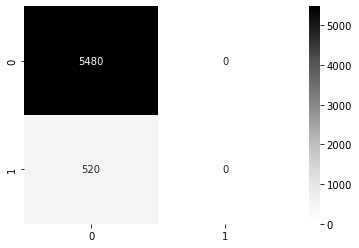

In [37]:
sns.heatmap((metrics.confusion_matrix(y_true=Y_test,y_pred=nncl.predict(X_test))),annot=True,fmt='.5g'
            ,cmap='Greys');

In [38]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true=Y_test,y_pred=nncl.predict(X_test)).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 5480 
False Positives: 0 
False Negatives: 520 
True Positives: 0


In [39]:
print(metrics.classification_report(y_true=Y_test,y_pred=nncl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5480
           1       0.00      0.00      0.00       520

    accuracy                           0.91      6000
   macro avg       0.46      0.50      0.48      6000
weighted avg       0.83      0.91      0.87      6000



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# END

In [ ]:
import tensorflow as tf

In [ ]:
from tf import keras